In [3]:
# Makes report plot
# improt and define basic params
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from pathlib import Path
from os import listdir, path, makedirs
sns.set(style="darkgrid")
%matplotlib inline

# Calibrated data dir
calibrated_base_dir = Path("..")/"../new_calibrate_full/"
uncalibrated_base_dir = Path("..")/"../uncalibrated_data/"
calibration_curve_base_dir = Path("..")/"../calibration_curve/"
calibrated_table_dir = Path("..")/"../tables/"
uncalibrated_table_dir = Path("..")/"../uncalibrated_tables/"

# Class to use
import sys
sys.path.append("../../python")
from auditing_setup.election_setting import Election

In [5]:
mpl.rcParams["figure.figsize"] = [8, 6]

def read_csv(file_path, sort_index=True, transpose=True):
    df = pd.read_csv(file_path)
    cols = []
    for i in df.columns:
        try:
            cols.append(float(i))
        except Exception as e:
            cols.append(i)
    df.columns = cols
    df.index.set_names("election", inplace=True)
    df.set_index("legend", inplace=True)
    if sort_index:
        df.sort_index(inplace=True)
    if transpose:
        df = df.transpose()
    return df

def get_num_cols(df):
    cols = []
    for i in df.columns:
        try:
            float(i)
            cols.append(float(i))
        except Exception as e:
            pass
    return cols

def format_legend(ax=None, legend=None, how=0):
    if ax is not None:
        legend_ = ax.legend_
    elif legend is not None:
        legend_ = legend
    else:
        return
    
    for text in legend_.texts:
        if how == 0:
            raw = text.get_text()
            text.set_text(raw.replace(" | ", ", ").replace(" ", "").rsplit(",", 1)[0])
        elif how == 1:
            raw = text.get_text()
            print(raw.rsplit(",", 1)[0].replace("_", " "))
            text.set_text(raw.rsplit(",", 1)[0].replace("_", " "))
    return legend_

In [6]:
cols = sns.color_palette("hls", 6)
cs_dict = {'bayesian | a=1 | b=1':cols[0],
           'bayesian_with_replacement | a=1 | b=1':cols[0],
           'bravo    | p=0.55':cols[1],
           'bravo    | p=0.7':cols[1],
           'bravo_without_replacement | p=0.55':cols[2],
           'bravo_without_replacement | p=0.7':cols[2],
           'clip    ':cols[3], 
           'max_sprt':cols[4],
           'truncated_bayesian | a=1 | b=1':cols[5]}

# ls_dict = {'bayesian | a=1 | b=1':'-',
#            'bayesian_with_replacement | a=1 | b=1':'--',
#            'bravo    | p=0.55':'-',
#            'bravo    | p=0.7':'--',
#            'bravo_without_replacement | p=0.55':'-',
#            'bravo_without_replacement | p=0.7':'--',
#            'clip    ':'--', 
#            'max_sprt':'--',
#            'truncated_bayesian | a=1 | b=1':'--'}
ls_dict = {'bayesian | a=1 | b=1':'-',
           'bayesian_with_replacement | a=1 | b=1':'-',
           'bravo    | p=0.55':'-',
           'bravo    | p=0.7':'-',
           'bravo_without_replacement | p=0.55':'-',
           'bravo_without_replacement | p=0.7':'-',
           'clip    ':'-', 
           'max_sprt':'-',
           'truncated_bayesian | a=1 | b=1':'-'}

ms_dict = {'bayesian | a=1 | b=1':'o',
           'bayesian_with_replacement | a=1 | b=1':'s',
           'bravo    | p=0.55':'<',
           'bravo    | p=0.7':'>',
           'bravo_without_replacement | p=0.55':'P',
           'bravo_without_replacement | p=0.7':'X',
           'clip    ':'o', 
           'max_sprt':'o',
           'truncated_bayesian | a=1 | b=1':'o'}

In [7]:
def map_styles(legends):
    cs, ls, ms = [], [], []
    for legend in legends:
        legend = legend.rsplit(" | ", 1)[0]
        ls.append(ls_dict[legend])
        cs.append(cs_dict[legend])
        ms.append(ms_dict[legend])
    return cs, ls, ms

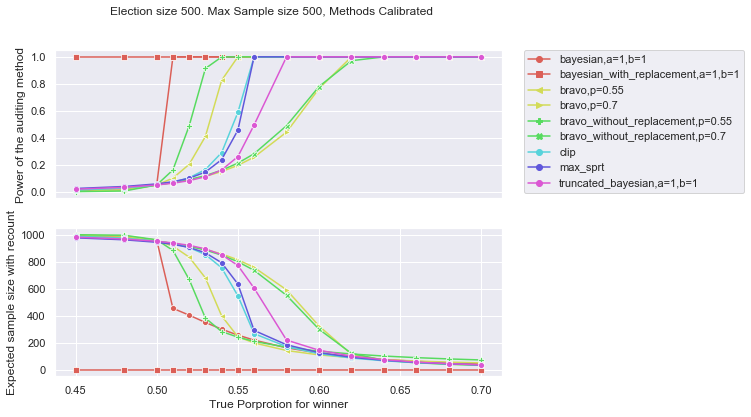

In [8]:
# 1. Basic 500/500 plot without replacement
# data
election = Election(500, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Election size 500. Max Sample size 500, Methods Calibrated")

data_type = "power.csv"
data_path = calibrated_table_dir/str(election)/data_type
data_df = read_csv(data_path)

ax = fig.add_subplot(211)
cs, ls, ms = map_styles(data_df.columns)
sns.lineplot(data=data_df, dashes=False, markers=ms, palette=cs, legend="full", ax=ax)
ax.xaxis.set_visible(False)
ax.yaxis.label.set_text("Power of the auditing method")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax)

data_type = "unconditional_mean_with_recount.csv"
data_path = calibrated_table_dir/str(election)/data_type
data_df = read_csv(data_path)

ax = fig.add_subplot(212)
cs, ls, ms = map_styles(data_df.columns)
sns.lineplot(data=data_df, dashes=False, markers=ms, palette=cs, legend=False, ax=ax)
ax.xaxis.label.set_text("True Porprotion for winner")
ax.yaxis.label.set_text("Expected sample size with recount")

bravo without replacement p=0.7
bayesian with replacement a=1 b=1 critical
bravo p=0.7
clip
truncated bayesian a=1 b=1 critical
bravo without replacement p=0.55
max sprt
bayesian a=1 b=1 critical
bravo p=0.55


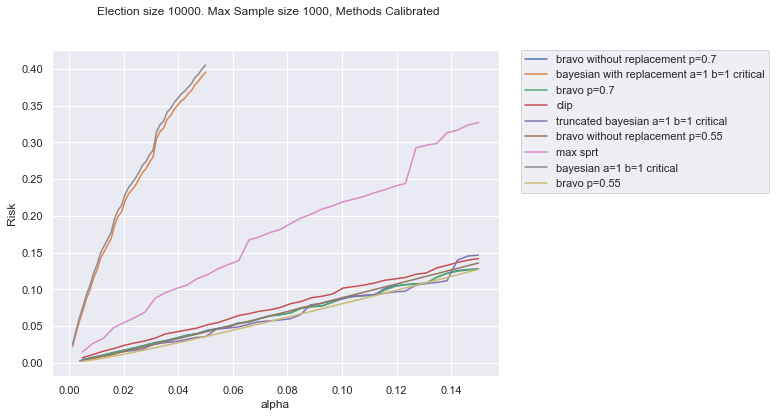

In [9]:
# Calibration Curve
# 1. Basic 5000/500 plot without replacement
# data
election = Election(10000, 1000, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Election size 10000. Max Sample size 1000, Methods Calibrated")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

for method_data in data_path.iterdir():
    method, param, _ = method_data.stem.rsplit("_", 2)
    param = param.split("=")[0]
    data_df = pd.read_csv(method_data)
    data_df.columns = [param, method]
    data_df.set_index(param, inplace=True)
    sns.lineplot(x=data_df.index, y=data_df[method], label=method, ax=ax)

    ax.xaxis.label.set_text(param)
    ax.yaxis.label.set_text("Risk")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

bravo without replacement | p=0.55 | alpha=0.076044921875
bravo without replacement | alpha=0.05 | p=0.55


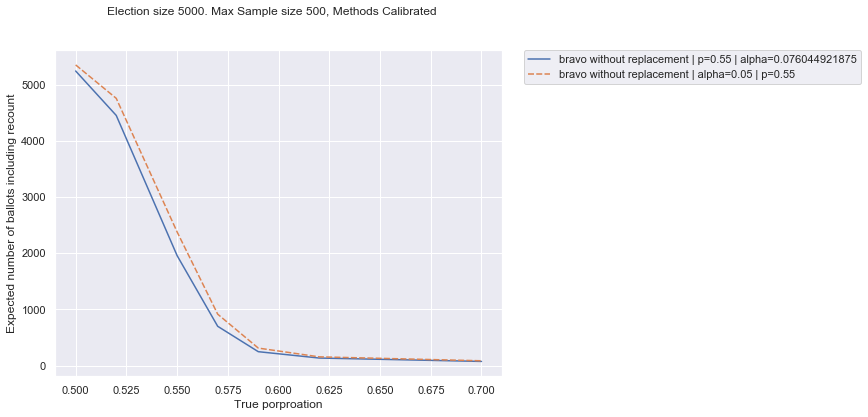

In [10]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Election size 5000. Max Sample size 500, Methods Calibrated")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data1_path = '/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/calibrated_data/n=005000_m=00500_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_unconditional_mean_with_recount.csv'
data1 = read_csv(data1_path)
data2_path = '/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/uncalibrated_data/election_n=005000_m=00500_replacement=False_step=1/bravo_without_replacement/bravo_without_replacement_unconditional_mean_with_recount.csv'
data2 = read_csv(data2_path)
data = data1.join(data2)
data = data.iloc[:, [0,2]]


sns.lineplot(data=data, ax=ax)
ax.xaxis.label.set_text("True porproation")
ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

# Plot cdf and pdf - 5000

In [185]:
pdf_path = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=005000_m=00500_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_pdf.csv')
cdf_path = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=005000_m=00500_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_cdf.csv')

### pdf

In [186]:
pdf_df = pd.read_csv(pdf_path, index_col=[0, 1])
pdf_df.head()

0.5      0.45  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.001939  0.000750   
                                                   11  0.004364  0.001670   
                                                   14  0.003268  0.001113   
                                                   16  0.004948  0.001668   
                                                   19  0.003098  0.000930   

                                                           0.48     0.5.1  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.001342  0.001939   
                                                   11  0.003015  0.004364   
                                                   14  0.002163  0.003268   
                                                   16  0.003270  0.004948   
                                                   19  0.001961  0.003098   

                                                           0.51      0.52  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.002318  0.002761   
                                                   11  0.005215  0.006205   
                                                   14  0.003982  0.004826   
                                                   16  0.006028  0.007297   
                                                   19  0.003849  0.004746   

                                                           0.53      0.54  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.003279  0.003880   
                                                   11  0.007354  0.008679   
                                                   14  0.005818  0.006978   
                                                   16  0.008780  0.010501   
                                                   19  0.005810  0.007061   

                                                           0.55      0.56  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.004578  0.005386   
                                                   11  0.010203  0.011950   
                                                   14  0.008326  0.009886   
                                                   16  0.012486  0.014760   
                                                   19  0.008521  0.010212   

                                                           0.58       0.6  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.007389  0.010029   
                                                   11  0.016211  0.021681   
                                                   14  0.013735  0.018726   
                                                   16  0.020276  0.027238   
                                                   19  0.014368  0.019677   

                                                           0.62      0.64  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.013477  0.017941   
                                                   11  0.028603  0.037240   
                                                   14  0.025066  0.032950   
                                                   16  0.035793  0.046016   
                                                   19  0.026235  0.034054   

                                                           0.66      0.68  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.023675  0.030982   
                                                   11  0.047864  0.060745   
                                                   14  0.042544  0.053951   
                                                   16  0.057869  0.071163   
                                                   19  0.043021  0.052863   

                                                            0.7  
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.040229  
                                                   11  0.076127  
                                                   14  0.067179  
                                                   16  0.085519  
                          

In [187]:
demo_df = pdf_df.xs(pdf_df.index.get_level_values(0)[-1])
demo_df = demo_df[[col for i, col in enumerate(demo_df.columns) if not i % 2]]

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


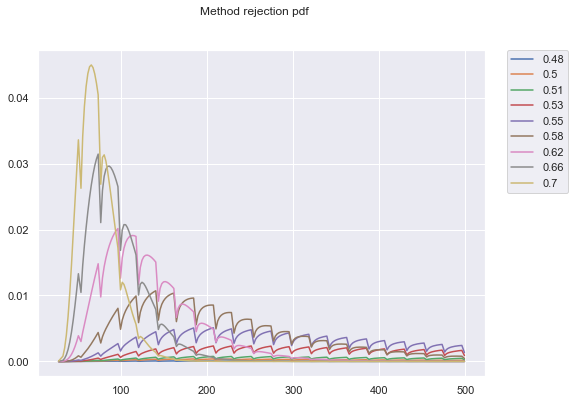

In [188]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection pdf")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data = demo_df

sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


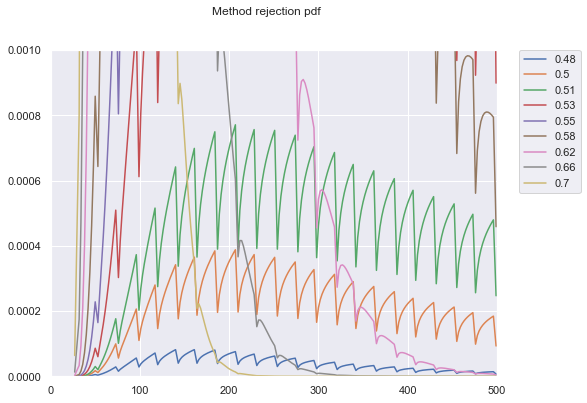

In [189]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
fig = plt.figure()
fig.suptitle("Method rejection pdf")

ax = fig.add_subplot(111)

data = demo_df

sns.lineplot(data=data, dashes=None, ax=ax)
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.001])
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

### cdf

In [190]:
cdf_df = pd.read_csv(cdf_path, index_col=[0, 1])
cdf_df.head()

0.5  0.45  0.48  0.5.1  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0  0.0   0.0   0.0    0.0   
                                                   1  0.0   0.0   0.0    0.0   
                                                   2  0.0   0.0   0.0    0.0   
                                                   3  0.0   0.0   0.0    0.0   
                                                   4  0.0   0.0   0.0    0.0   

                                                      0.51  0.52  0.53  0.54  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0   0.0   0.0   0.0   0.0   
                                                   1   0.0   0.0   0.0   0.0   
                                                   2   0.0   0.0   0.0   0.0   
                                                   3   0.0   0.0   0.0   0.0   
                                                   4   0.0   0.0   0.0   0.0   

                                                      0.55  0.56  0.58  0.6  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0   0.0   0.0   0.0  0.0   
                                                   1   0.0   0.0   0.0  0.0   
                                                   2   0.0   0.0   0.0  0.0   
                                                   3   0.0   0.0   0.0  0.0   
                                                   4   0.0   0.0   0.0  0.0   

                                                      0.62  0.64  0.66  0.68  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0   0.0   0.0   0.0   0.0   
                                                   1   0.0   0.0   0.0   0.0   
                                                   2   0.0   0.0   0.0   0.0   
                                                   3   0.0   0.0   0.0   0.0   
                                                   4   0.0   0.0   0.0   0.0   

                                                      0.7  
bravo_without_replacement | p=0.7 | alpha=0.058... 0  0.0  
                                                   1  0.0  
                                                   2  0.0  
                                                   3  0.0  
                                                   4  0.0

In [191]:
demo_df = cdf_df.xs(pdf_df.index.get_level_values(0)[-1])
demo_df = demo_df[[col for i, col in enumerate(demo_df.columns) if not i%2]]

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


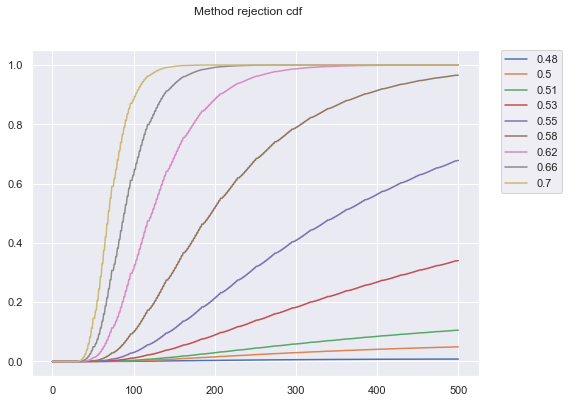

In [192]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data = demo_df

sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


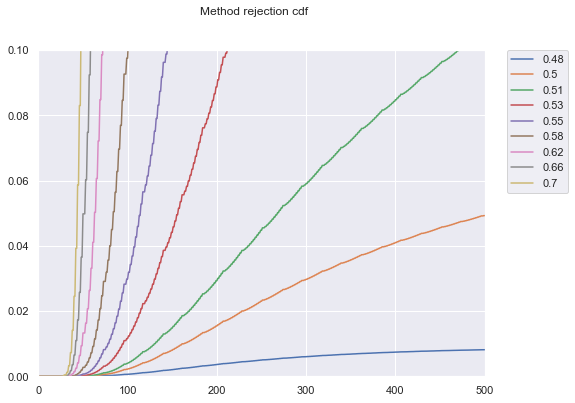

In [194]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)

data = demo_df

ax.set_xlim([0, 500])
ax.set_ylim([0, 0.1])
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

# Plot cdf and pdf - 20000

In [195]:
pdf_path = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_pdf.csv')
cdf_path = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_cdf.csv')

### pdf

In [196]:
pdf_df = pd.read_csv(pdf_path, index_col=[0, 1])
pdf_df.head()

0.5      0.45  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.001950  0.000755   
                                                   11  0.004387  0.001682   
                                                   14  0.003289  0.001123   
                                                   17  0.002488  0.000757   
                                                   19  0.003744  0.001127   

                                                           0.48     0.5.1  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.001350  0.001950   
                                                   11  0.003033  0.004387   
                                                   14  0.002179  0.003289   
                                                   17  0.001580  0.002488   
                                                   19  0.002373  0.003744   

                                                           0.51      0.52  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.002330  0.002775   
                                                   11  0.005241  0.006235   
                                                   14  0.004006  0.004854   
                                                   17  0.003091  0.003814   
                                                   19  0.004649  0.005729   

                                                           0.53      0.54  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.003294  0.003898   
                                                   11  0.007387  0.008716   
                                                   14  0.005850  0.007013   
                                                   17  0.004675  0.005695   
                                                   19  0.007010  0.008515   

                                                           0.55      0.56  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.004599  0.005409   
                                                   11  0.010245  0.011996   
                                                   14  0.008366  0.009929   
                                                   17  0.006894  0.008295   
                                                   19  0.010271  0.012303   

                                                           0.58       0.6  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.007418  0.010066   
                                                   11  0.016266  0.021746   
                                                   14  0.013787  0.018787   
                                                   17  0.011794  0.016381   
                                                   19  0.017295  0.023666   

                                                           0.62      0.64  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.013522  0.017996   
                                                   11  0.028679  0.037326   
                                                   14  0.025134  0.033024   
                                                   17  0.022232  0.029489   
                                                   19  0.031530  0.040900   

                                                           0.66      0.68  \
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.023741  0.031061   
                                                   11  0.047959  0.060847   
                                                   14  0.042621  0.054026   
                                                   17  0.038227  0.048413   
                                                   19  0.051639  0.063418   

                                                            0.7  
bravo_without_replacement | p=0.7 | alpha=0.058... 9   0.040322  
                                                   11  0.076233  
                                                   14  0.067246  
                                                   17  0.059868  
                          

In [199]:
demo_df = pdf_df.xs(pdf_df.index.get_level_values(0)[-1])
demo_df = demo_df[[col for i, col in enumerate(demo_df.columns) if not i % 2]]

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


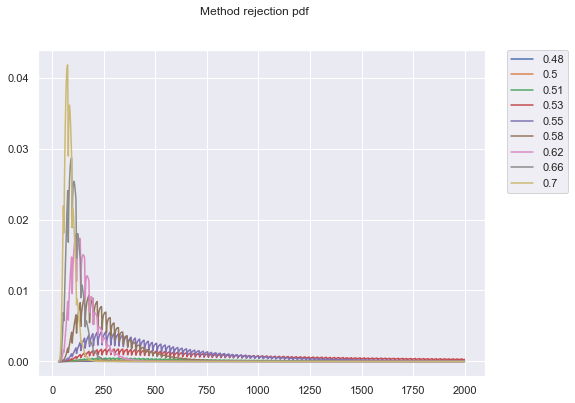

In [200]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection pdf")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data = demo_df

sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


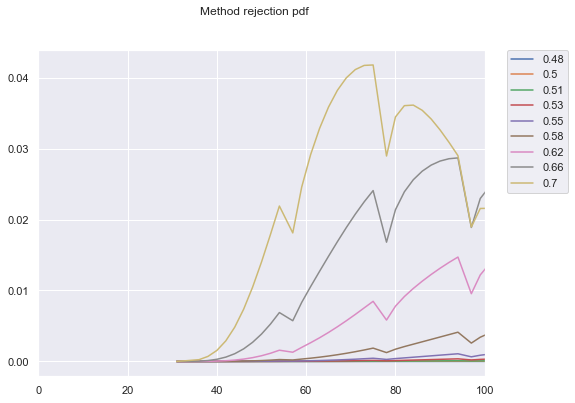

In [201]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection pdf")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data = demo_df

sns.lineplot(data=data, dashes=None, ax=ax)
ax.set_xlim([0, 100])
# ax.set_ylim([0, 0.006])
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

0.48
0.5
0.51
0.53
0.55
0.58
0.62
0.66
0.7


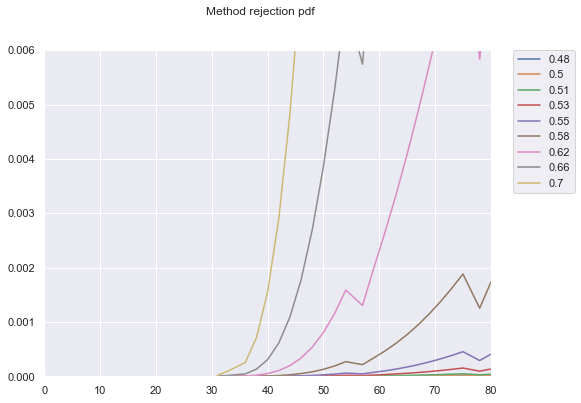

In [202]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection pdf")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data = demo_df

sns.lineplot(data=data, dashes=None, ax=ax)
ax.set_xlim([0, 80])
ax.set_ylim([0, 0.006])
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

### cdf

In [203]:
cdf_df = pd.read_csv(cdf_path, index_col=[0, 1])
cdf_df.head()

0.5  0.45  0.48  0.5.1  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0  0.0   0.0   0.0    0.0   
                                                   1  0.0   0.0   0.0    0.0   
                                                   2  0.0   0.0   0.0    0.0   
                                                   3  0.0   0.0   0.0    0.0   
                                                   4  0.0   0.0   0.0    0.0   

                                                      0.51  0.52  0.53  0.54  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0   0.0   0.0   0.0   0.0   
                                                   1   0.0   0.0   0.0   0.0   
                                                   2   0.0   0.0   0.0   0.0   
                                                   3   0.0   0.0   0.0   0.0   
                                                   4   0.0   0.0   0.0   0.0   

                                                      0.55  0.56  0.58  0.6  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0   0.0   0.0   0.0  0.0   
                                                   1   0.0   0.0   0.0  0.0   
                                                   2   0.0   0.0   0.0  0.0   
                                                   3   0.0   0.0   0.0  0.0   
                                                   4   0.0   0.0   0.0  0.0   

                                                      0.62  0.64  0.66  0.68  \
bravo_without_replacement | p=0.7 | alpha=0.058... 0   0.0   0.0   0.0   0.0   
                                                   1   0.0   0.0   0.0   0.0   
                                                   2   0.0   0.0   0.0   0.0   
                                                   3   0.0   0.0   0.0   0.0   
                                                   4   0.0   0.0   0.0   0.0   

                                                      0.7  
bravo_without_replacement | p=0.7 | alpha=0.058... 0  0.0  
                                                   1  0.0  
                                                   2  0.0  
                                                   3  0.0  
                                                   4  0.0

In [204]:
demo_df = cdf_df.xs(pdf_df.index.get_level_values(0)[0])
demo_df = demo_df[[col for i, col in enumerate(demo_df.columns)]]

0.5
0.45
0.48
0.5.1
0.51
0.52
0.53
0.54
0.55
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7


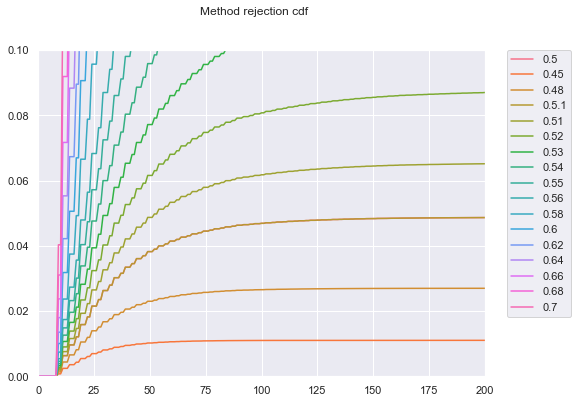

In [205]:
# 3. Comparison between calibration and uncalibration
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data_path = calibration_curve_base_dir/str(election)

data = demo_df

ax.set_xlim([0, 200])
ax.set_ylim([0, 0.1])
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

## Between Methods

## n = 20000

In [206]:
pdf_path1 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_pdf.csv')
cdf_path1 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_cdf.csv')
pdf_path2 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bayesian_0.05/bayesian_pdf.csv')
cdf_path2 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bayesian_0.05/bayesian_cdf.csv')

In [207]:
cdf_df1 = pd.read_csv(cdf_path1, index_col=[0, 1])
cdf_df2 = pd.read_csv(cdf_path2, index_col=[0, 1])


demo_df1 = cdf_df1.xs(cdf_df1.index.get_level_values(0)[-1])
demo_df1 = demo_df1[[col for i, col in enumerate(demo_df1.columns) if not i%3]]
demo_df1.columns = ["bravo_"+col for col in demo_df1.columns]
demo_df2 = cdf_df2.xs(cdf_df2.index.get_level_values(0)[0])
demo_df2 = demo_df2[[col for i, col in enumerate(demo_df2.columns) if not i%3]]
demo_df2.columns = ["bayesian_"+col for col in demo_df2.columns]

In [208]:
demo_df = demo_df1.join(demo_df2)

bravo 0.5
bravo 0.5.1
bravo 0.53
bravo 0.56
bravo 0.62
bravo 0.68
bayesian 0.5
bayesian 0.5.1
bayesian 0.53
bayesian 0.56
bayesian 0.62
bayesian 0.68


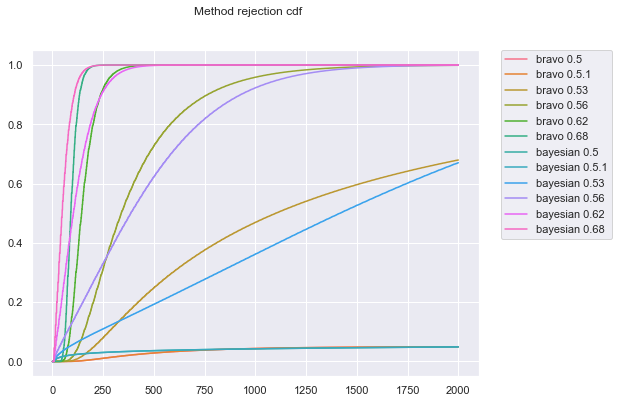

In [209]:
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data = demo_df
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

bravo 0.5
bravo 0.5.1
bravo 0.53
bravo 0.56
bravo 0.62
bravo 0.68
bayesian 0.5
bayesian 0.5.1
bayesian 0.53
bayesian 0.56
bayesian 0.62
bayesian 0.68


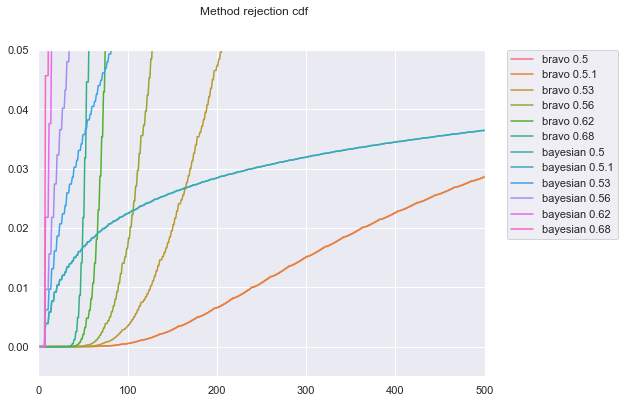

In [211]:
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data = demo_df
ax.set_xlim([0, 500])
ax.set_ylim([-0.005, 0.05])
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

## n = 5000

bravo 0.5
bravo 0.5.1
bravo 0.53
bravo 0.56
bravo 0.62
bravo 0.68
bayesian 0.5
bayesian 0.5.1
bayesian 0.53
bayesian 0.56
bayesian 0.62
bayesian 0.68
bravo 0.5
bravo 0.5.1
bravo 0.53
bravo 0.56
bravo 0.62
bravo 0.68
bayesian 0.5
bayesian 0.5.1
bayesian 0.53
bayesian 0.56
bayesian 0.62
bayesian 0.68


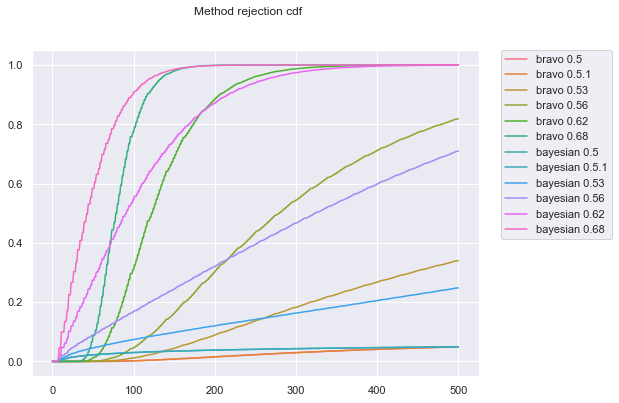

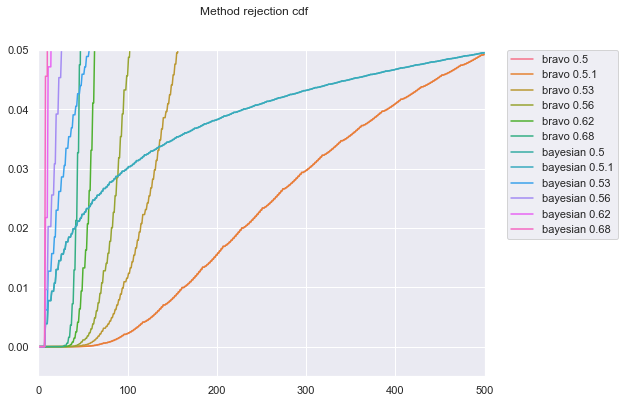

In [220]:
pdf_path1 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=005000_m=00500_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_pdf.csv')
cdf_path1 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=005000_m=00500_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_cdf.csv')
pdf_path2 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=005000_m=00500_p=0.500_replacement=False_step=1/bayesian_0.05/bayesian_pdf.csv')
cdf_path2 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=005000_m=00500_p=0.500_replacement=False_step=1/bayesian_0.05/bayesian_cdf.csv')
cdf_df1 = pd.read_csv(cdf_path1, index_col=[0, 1])
cdf_df2 = pd.read_csv(cdf_path2, index_col=[0, 1])

demo_df1 = cdf_df1.xs(cdf_df1.index.get_level_values(0)[-1])
demo_df1 = demo_df1[[col for i, col in enumerate(demo_df1.columns) if not i%3]]
demo_df1.columns = ["bravo_"+col for col in demo_df1.columns]
demo_df2 = cdf_df2.xs(cdf_df2.index.get_level_values(0)[0])
demo_df2 = demo_df2[[col for i, col in enumerate(demo_df2.columns) if not i%3]]
demo_df2.columns = ["bayesian_"+col for col in demo_df2.columns]
demo_df = demo_df1.join(demo_df2)
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data = demo_df
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)


# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data = demo_df
ax.set_xlim([0, 500])
ax.set_ylim([-0.005, 0.05])
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

## n = 20000

bravo 0.5
bravo 0.5.1
bravo 0.53
bravo 0.56
bravo 0.62
bravo 0.68
bayesian 0.5
bayesian 0.5.1
bayesian 0.53
bayesian 0.56
bayesian 0.62
bayesian 0.68
bravo 0.5
bravo 0.5.1
bravo 0.53
bravo 0.56
bravo 0.62
bravo 0.68
bayesian 0.5
bayesian 0.5.1
bayesian 0.53
bayesian 0.56
bayesian 0.62
bayesian 0.68


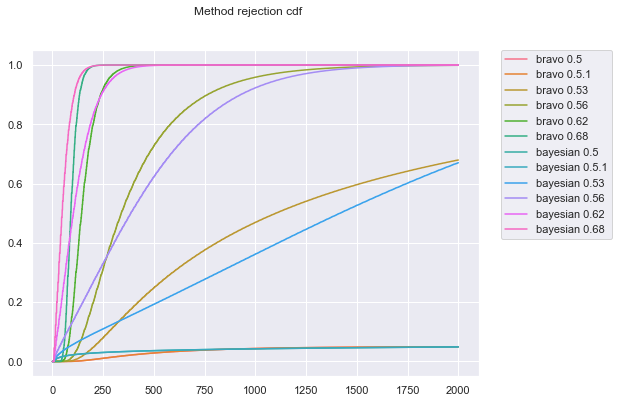

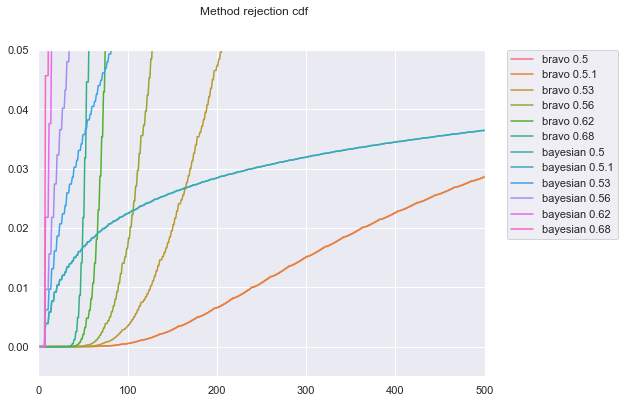

In [221]:
pdf_path1 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_pdf.csv')
cdf_path1 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_cdf.csv')
pdf_path2 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bayesian_0.05/bayesian_pdf.csv')
cdf_path2 = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=020000_m=02000_p=0.500_replacement=False_step=1/bayesian_0.05/bayesian_cdf.csv')
cdf_df1 = pd.read_csv(cdf_path1, index_col=[0, 1])
cdf_df2 = pd.read_csv(cdf_path2, index_col=[0, 1])

demo_df1 = cdf_df1.xs(cdf_df1.index.get_level_values(0)[-1])
demo_df1 = demo_df1[[col for i, col in enumerate(demo_df1.columns) if not i%3]]
demo_df1.columns = ["bravo_"+col for col in demo_df1.columns]
demo_df2 = cdf_df2.xs(cdf_df2.index.get_level_values(0)[0])
demo_df2 = demo_df2[[col for i, col in enumerate(demo_df2.columns) if not i%3]]
demo_df2.columns = ["bayesian_"+col for col in demo_df2.columns]
demo_df = demo_df1.join(demo_df2)
# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data = demo_df
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)


# Specifically made for expected count for bravo
# data
election = Election(5000, 500, 0.5, 1, False)
fig = plt.figure()
fig.suptitle("Method rejection cdf")

ax = fig.add_subplot(111)
data = demo_df
ax.set_xlim([0, 2000])
ax.set_ylim([-0.005, 0.05])
sns.lineplot(data=data, dashes=None, ax=ax)
# ax.xaxis.label.set_text("True porproation")
# ax.yaxis.label.set_text("Expected number of ballots including recount")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend=format_legend(ax, how=1)

# Compare with/without minstopping

### No min stop

In [100]:
pdf_path = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=001000_m=01000=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_pdf.csv')
cdf_path = ('/Users/Dovermore/Documents/Research/AustralianElectionAuditing/AuditAnalysis.nosync/' + 
              'new_calibrate_full/n=001000=01000=0.500_replacement=False_step=1/bravo_without_replacement_0.05/bravo_without_replacement_cdf.csv')